In [14]:
import gym
import cv2
import pickle
import matplotlib.pyplot as plt 

## Collect Data

In [15]:
def save_file(file_path, data):
    with open(file_path, 'wb') as file:
        pickle.dump(data, file, protocol=pickle.HIGHEST_PROTOCOL)

def collect_frames():
    rgb_frames = []
    actions = []
    env = gym.make("Asterix-v0")
    
    n_episode = 1
    for _ in range(n_episode):
        done = False
        obs = env.reset()
        
        while not done:
            action = env.action_space.sample()
            rgb_frames.append(obs)
            actions.append(action)
            obs, reward, done, info = env.step(action)
            
    
    return rgb_frames, actions

In [16]:
rgb_frames, actions = collect_frames()
save_file('static/asterix/data.pickle', {"rgb_frames": rgb_frames, "actions": actions})



## Visualize to Debug

In [17]:
def read_from_file(file_path):
    with open('static/asterix/data.pickle', 'rb') as file:
        data = pickle.load(file)
    return data

asterix_data = read_from_file('static/asterix/data.pickle')
frames = asterix_data['rgb_frames']

num frames:  283
frame shape:  (210, 160, 3)


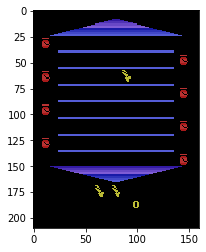

In [18]:
frame = frames[2]
print('num frames: ', len(frames))
print('frame shape: ', frame.shape)
plt.imshow(frame)